In [1]:
setwd('/import/DB/zhang//data')

In [2]:
sce = readRDS('./scRNA.rename.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [3]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject



In [4]:
Idents(sce) = 'celltype'

In [5]:
DefaultAssay(sce) = 'RNA'

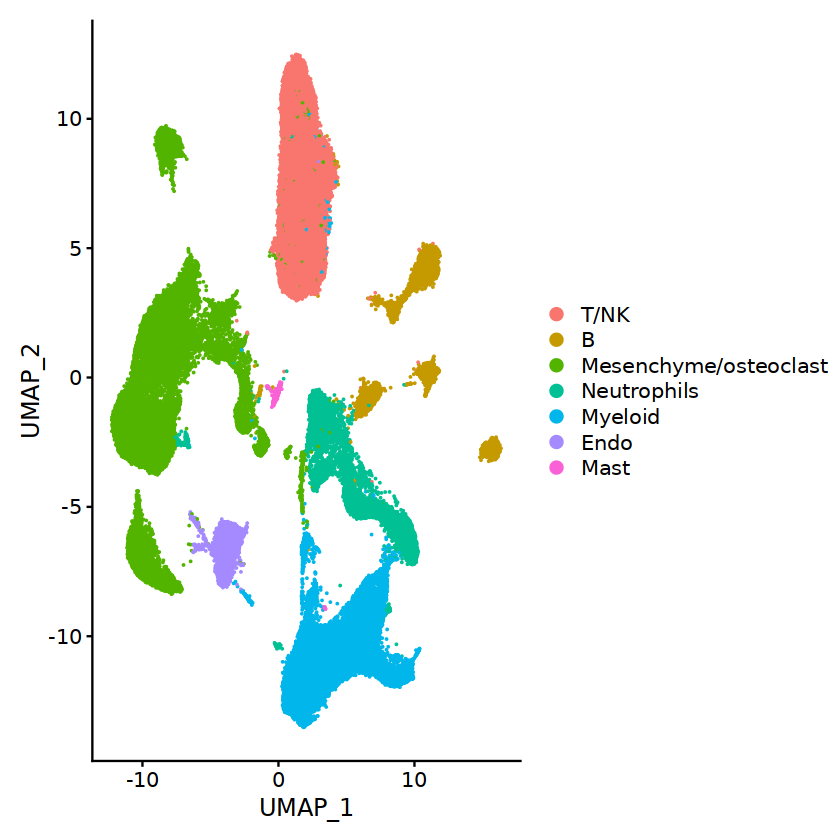

In [6]:
DimPlot(sce)

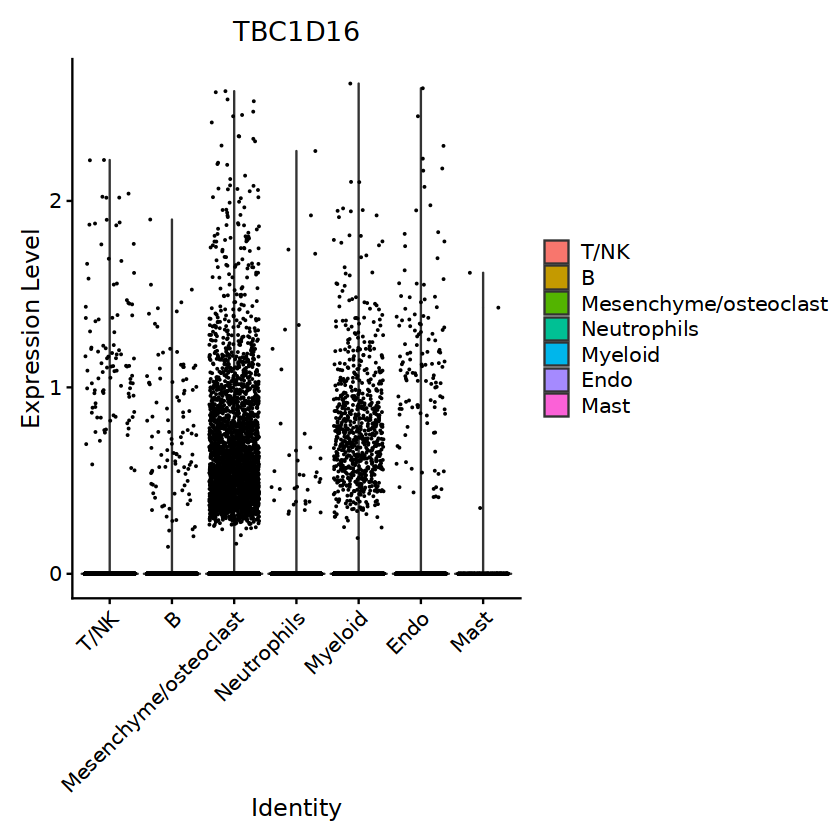

In [7]:
VlnPlot(sce,features = 'TBC1D16')

In [8]:
cells = unique(sce$celltype)

In [9]:
table(sce$group)


     OS control 
  41562   45935 

In [10]:
l <- data.frame()

In [11]:
for (i in cells){
    Idents(sce) = 'celltype'
    cell = subset(sce,idents = i)
    DefaultAssay(cell) = 'RNA'
    Idents(cell) = 'group'
    diffgene = FindMarkers(cell,ident.1 = 'OS')
    diffgene$celltype = i
    l <- rbind(l, diffgene)
}

In [12]:
table(l$celltype)


                    B                  Endo                  Mast 
                 1553                  1580                  2421 
Mesenchyme/osteoclast               Myeloid           Neutrophils 
                 2789                  1430                  2231 
                 T/NK 
                 1279 

In [13]:
write.csv(l,file = 'count.gene.csv')

In [14]:
library(Augur)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
Registered S3 method overwritten by 'yardstick':
  method       from         
  print.metric spatstat.geom



In [15]:
sc = sce

In [16]:
sc$cell_type = sc$celltype
sc$label = sc$group

In [17]:
augur = calculate_auc(sc,n_threads = 8)

using default assay: RNA ...



In [18]:
augur$AUC

cell_type,auc
<chr>,<dbl>
Mesenchyme/osteoclast,0.9193726
Neutrophils,0.8666289
T/NK,0.8468367
Myeloid,0.8272449
Mast,0.8031973
B,0.7837831
Endo,0.7770011
